In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
# police = pd.read_csv('PoliceKillingsUS.csv')
# household = pd.read_csv('MedianHouseholdIncome2015.csv')
# highschool = pd.read_csv('PercentOver25CompletedHighSchool.csv')
# poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv')
# race = pd.read_csv('ShareRaceByCity.csv')
# city_data = pd.read_csv("city_data.csv").iloc[:,1:]

In [32]:
import itertools
n_instances = 10
class_1 = np.random.rand(n_instances//2, 3)/5
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_instances//2, 3)/5
data = np.concatenate((class_1, class_2))
w = np.zeros((n_instances, n_instances))
for i, j in itertools.product(*[range(n_instances)]*2):
    w[i, j] = np.linalg.norm(data[i]-data[j])

In [33]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.optimization.applications.ising import max_cut
from qiskit.aqua.components.optimizers import COBYLA

In [35]:
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram
qubit_operators, offset = max_cut.get_operator(w)
p = 1
optimizer = COBYLA()
qaoa = QAOA(qubit_operators, optimizer, p)
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=100)
result = qaoa.run(quantum_instance)
x = sample_most_likely(result['eigvecs'][0])
graph_solution = max_cut.get_graph_solution(x)
print('energy:', result['energy'])
print('maxcut objective:', result['energy'] + offset)
print('solution:', max_cut.get_graph_solution(x))

energy: -1.6218462023796807
maxcut objective: -11.046178453951931
solution: [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


/Users/mingzhang/anaconda3/envs/ibm_hackathon/lib/python3.9/site-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:150: DeprecationWarning: eigvecs deprecated, use eigenstate property.
  warnings.warn('eigvecs deprecated, use eigenstate property.', DeprecationWarning)
/Users/mingzhang/anaconda3/envs/ibm_hackathon/lib/python3.9/site-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:138: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)
/Users/mingzhang/anaconda3/envs/ibm_hackathon/lib/python3.9/site-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:138: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)


In [51]:
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
n_instances = 10
class_1 = np.random.rand(n_instances//2, 3)/5
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_instances//2, 3)/5
data = np.concatenate((class_1, class_2))
w = np.zeros((n_instances, n_instances))
for i, j in itertools.product(*[range(n_instances)]*2):
    w[i, j] = np.linalg.norm(data[i]-data[j])
qubitOp, offset = max_cut.get_operator(w)
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset)
qp.to_docplex().prettyprint()
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;

minimize
 [ - 3.447505 x_0^2 + 0.165890 x_0*x_1 + 0.236171 x_0*x_2 + 0.210401 x_0*x_3
 + 0.291659 x_0*x_4 + 1.411867 x_0*x_5 + 1.300017 x_0*x_6 + 1.065538 x_0*x_7
 + 1.149811 x_0*x_8 + 1.063654 x_0*x_9 - 3.125254 x_1^2 + 0.173274 x_1*x_2
 + 0.139460 x_1*x_3 + 0.225020 x_1*x_4 + 1.323358 x_1*x_5 + 1.203487 x_1*x_6
 + 0.991725 x_1*x_7 + 1.038172 x_1*x_8 + 0.990122 x_1*x_9 - 3.406976 x_2^2
 + 0.216871 x_2*x_3 + 0.068832 x_2*x_4 + 1.457371 x_2*x_5 + 1.298837 x_2*x_6
 + 1.116290 x_2*x_7 + 1.140612 x_2*x_8 + 1.105694 x_2*x_9 - 3.019100 x_3^2
 + 0.281946 x_3*x_4 + 1.272777 x_3*x_5 + 1.120168 x_3*x_6 + 0.916768 x_3*x_7
 + 0.973577 x_3*x_8 + 0.906231 x_3*x_9 - 3.607669 x_4^2 + 1.501830 x_4*x_5
 + 1.341750 x_4*x_6 + 1.167908 x_4*x_7 + 1.178871 x_4*x_

In [58]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
n_instances = 10
class_1 = np.random.rand(n_instances//2, 3)/5
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_instances//2, 3)/5
data = np.concatenate((class_1, class_2))
w = np.zeros((n_instances, n_instances))
for i, j in itertools.product(*[range(n_instances)]*2):
    w[i, j] = np.linalg.norm(data[i]-data[j])
qubitOp, offset = max_cut.get_operator(w)
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
#provider = IBMQ.get_provider(group='open')
#backend= provider.get_backend('ibmq_qasm_simulator')
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(qubitOp, ry, spsa, quantum_instance=quantum_instance)

# run VQE
result = vqe.run(quantum_instance)

# print results
x = sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', max_cut.get_graph_solution(x))
print('solution objective:', max_cut.max_cut_value(x, w))

energy: -2.6389056674481437
time: 22.49450993537903
max-cut objective: -12.128012486933274
solution: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
solution objective: 16.055244822872503


In [56]:
IBMQ.save_account('9f8079242d2bdb971ea6e0b2ae710c74238181613343b07a30f5748feb6bac9cb28577c20794b4c787894ce9c637c7f8c7d7aa198e721e4d96706c53ca3e7134', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
n_instances = 12
class_1 = np.random.rand(n_instances//2, 3)/5
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_instances//2, 3)/5
class_3 = (-1,-0.2,-0.4) + np.random.rand(n_instances//2, 3)/5
data = np.concatenate((class_1, class_2, class_3))
w = np.zeros((n_instances, n_instances))
for i, j in itertools.product(*[range(n_instances)]*2):
    w[i, j] = np.linalg.norm(data[i]-data[j])
h = 3
comp_qubits = 15

# QAOA hyperparameters and backend initialization
p = 1  # Number of adiabatic steps must be > 0
optimizer = COBYLA()  # Arbitrary selection
provider = IBMQ.get_provider(group='open')  # Load provider to access backends
backend_ibm = provider.get_backend('ibmq_qasm_simulator')  # Simulate on IBM's cloud service
backend_local = BasicAer.get_backend('statevector_simulator')  # Simulate on local machine

# Iterate over minimum height of tree
for i in range(0,h):
    # Initialize 'labels' column for future QAOA output
    data.loc[:,'cluster_'+str(i)] = np.nan
    data.loc[:,'cut_'+str(i)] = np.nan
    
    # Select subsets of data based on clustering from previous max-cut solution
    dfs = []
    if i > 0:
        cluster_range = data.loc[:,'cluster_'+str(i-1)].unique()
        for j in cluster_range:
            df_cluster = data.loc[data['cluster_'+str(i-1)] == j,data.columns[:4]]
            # if df_cluster length is 1 then it can't be further cut, so only consider lengths > 1
            if len(df_cluster.index) > 1:
                dfs.append(df_cluster)
    else:
        dfs.append(data[data.columns[:4]])

    # Solve max-cut with QAOA on each child cluster
    for j, df_part in enumerate(dfs):
        w = calc_w(df_part.values)  # Calculate pairwise distances between points
        
        # Initialize QAOA and execute
        qubit_ops, offset = max_cut.get_max_cut_qubitops(w)
        qaoa = QAOA(qubit_ops, optimizer, p)
        # If there are 'too many' qubits, use IBM's 32 qubit backend
        if w.shape[0] > comp_qubits:
            backend = backend_ibm
        else:
            backend = backend_local
        quantum_instance = QuantumInstance(backend, shots=1, skip_qobj_validation=False)
        result = qaoa.run(quantum_instance)

        # Extract results
        x = max_cut.sample_most_likely(result['eigvecs'][0])

        # Store cluster results back into Dataframe. Labels must be unqiue each iteration hence + 2*j
        df_part.loc[:,'cluster_'+str(i)] = max_cut.get_graph_solution(x) + 2*j
        df_part.loc[:,'cut_'+str(i)] = max_cut.max_cut_value(x, w)
        
        # Update Dataframe with new clusters and cut weights
        data.update(df_part)

    print('Iteration',i+1,'of',h,'completed')

/Users/mingzhang/anaconda3/envs/ibm_hackathon/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [59]:
from sklearn.datasets import make_blobs
import math
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [60]:
backend = Aer.get_backend('qasm_simulator')
def get_theta(d):
    x = d[0]
    y = d[1]
    
    theta = 2*math.acos((x+y)/2.0)
    return theta

In [108]:
def get_Distance(x,y):
    theta_1 = get_theta(x)
    theta_2 = get_theta(y)
    
    # create Quantum Register called "qr" with 3 qubits
    qr = QuantumRegister(3, name="qr")
    # create Classical Register called "cr" with 5 bits
    cr = ClassicalRegister(3, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")
    
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.u3(theta_1, pi, pi, qr[1])
    qc.u3(theta_2, pi, pi, qr[2])
    qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])

    qc.measure(qr[0], cr[0])
    qc.reset(qr)

    #print('----before run----')
    job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
    result = job.result()
    data = result.data()['counts']
    
    if len(data)==1:
        return 0.0
    else:
        return data['0x1']/1024.0

In [109]:
def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]
    return points,centers

def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

def find_nearest_neighbour(points,centroids):    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):            
            temp_dis = get_Distance(points[i,:],centroids[j,:])            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind    
    return centers

def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1   
    centroids = np.zeros([k,2])    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x
    
    return points

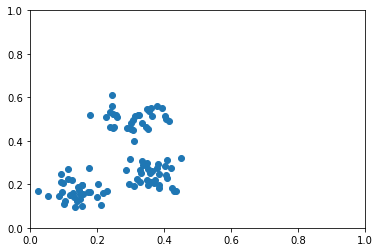

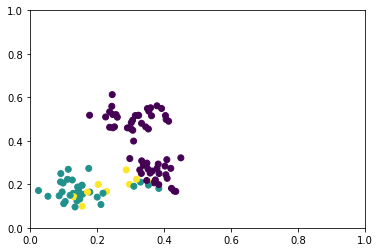

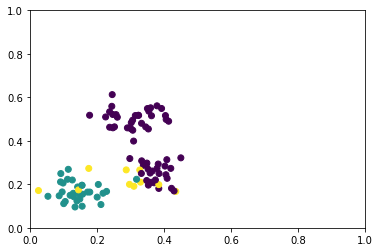

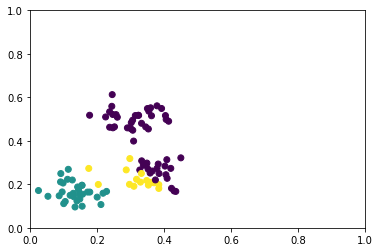

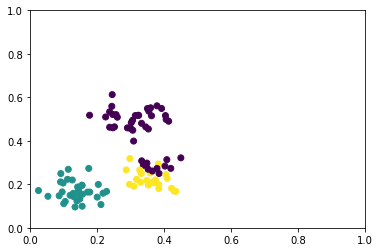

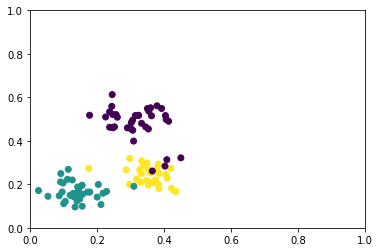

In [110]:
n = 100      # number of data points
k = 3        # Number of centers
std = 2      # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset

points = preprocess(points)                # Normalize dataset
plt.figure()                                  
draw_plot(points,o_centers,label=False)

centroids = initialize_centers(points,k)   # Intialize centroids


# run k-means algorithm
for i in range(5):
    
    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids = find_centroids(points,centers) 

In [101]:
theta_1 = get_theta(points[0])
theta_2 = get_theta(points[1])
qr = QuantumRegister(3, name="qr")
    # create Classical Register called "cr" with 5 bits
cr = ClassicalRegister(3, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="k_means")
    
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.u3(theta_1, pi, pi, qr[1])
qc.u3(theta_2, pi, pi, qr[2])
qc.cswap(qr[0], qr[1], qr[2])
qc.h(qr[0])

qc.measure(qr[0], cr[0])
qc.reset(qr)

    #print('----before run----')
job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
result = job.result()
result.data()

{'counts': {'0x0': 1013, '0x1': 11}}

In [111]:
make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)

(array([[-1.94461918e-01, -2.37314693e+00],
        [-9.06086244e+00, -9.75670345e+00],
        [-2.35707838e+00,  4.52355552e+00],
        [-1.01580252e+01, -3.58807028e+00],
        [ 2.15622717e-01, -4.32126027e+00],
        [-6.35363571e+00, -6.54246883e+00],
        [ 4.79966136e-02,  7.75198839e+00],
        [-2.17320246e+00,  5.51708669e+00],
        [-4.79551352e-02, -3.56228532e+00],
        [-7.56456891e+00, -3.41319312e+00],
        [ 2.83074041e+00, -3.40417462e+00],
        [-8.39949850e+00, -1.07874954e+01],
        [-4.91895060e+00,  4.62300063e+00],
        [-2.99091265e-01, -2.79891815e+00],
        [-3.48501513e-01,  4.68647646e+00],
        [ 2.24349867e+00,  6.14171595e+00],
        [ 2.33009952e+00, -1.70950005e+00],
        [-9.51978849e+00, -8.26553545e+00],
        [-1.02551860e+01, -5.53408890e+00],
        [ 1.34378808e+00, -4.40551520e+00],
        [ 4.10606216e+00, -1.34940195e+00],
        [-8.56355857e-01, -1.93367281e+00],
        [ 2.36898836e+00, -5.344